In [ ]:
!pip install git+https://github.com/Ritvik19/pyradox.git

In [2]:
import keras
import numpy as np
from pyradox import convnets

Using TensorFlow backend.


In [3]:
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

x_train = x_train.astype("float32") / 255
x_train = np.expand_dims(x_train, -1)
y_train = keras.utils.to_categorical(y_train, 10)

x_test = x_test.astype("float32") / 255
x_test = np.expand_dims(x_test, -1)
y_test = keras.utils.to_categorical(y_test, 10)

In [4]:
inputs = keras.Input(shape=(28, 28, 1))
x = convnets.GeneralizedDenseNets([2, 2], use_bias=True)(inputs)
x = keras.layers.GlobalAvgPool2D()(x)
outputs = keras.layers.Dense(10, activation="softmax")(x)

model = keras.models.Model(inputs=inputs, outputs=outputs) 

Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_1 (InputLayer)            (None, 28, 28, 1)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 34, 34, 1)    0           input_1[0][0]                    
__________________________________________________________________________________________________
conv2d_1 (Conv2D)               (None, 14, 14, 64)   3200        zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
batch_normalization_1 (BatchNor (None, 14, 14, 64)   256         conv2d_1[0][0]                   
____________________________________________________________________________________________

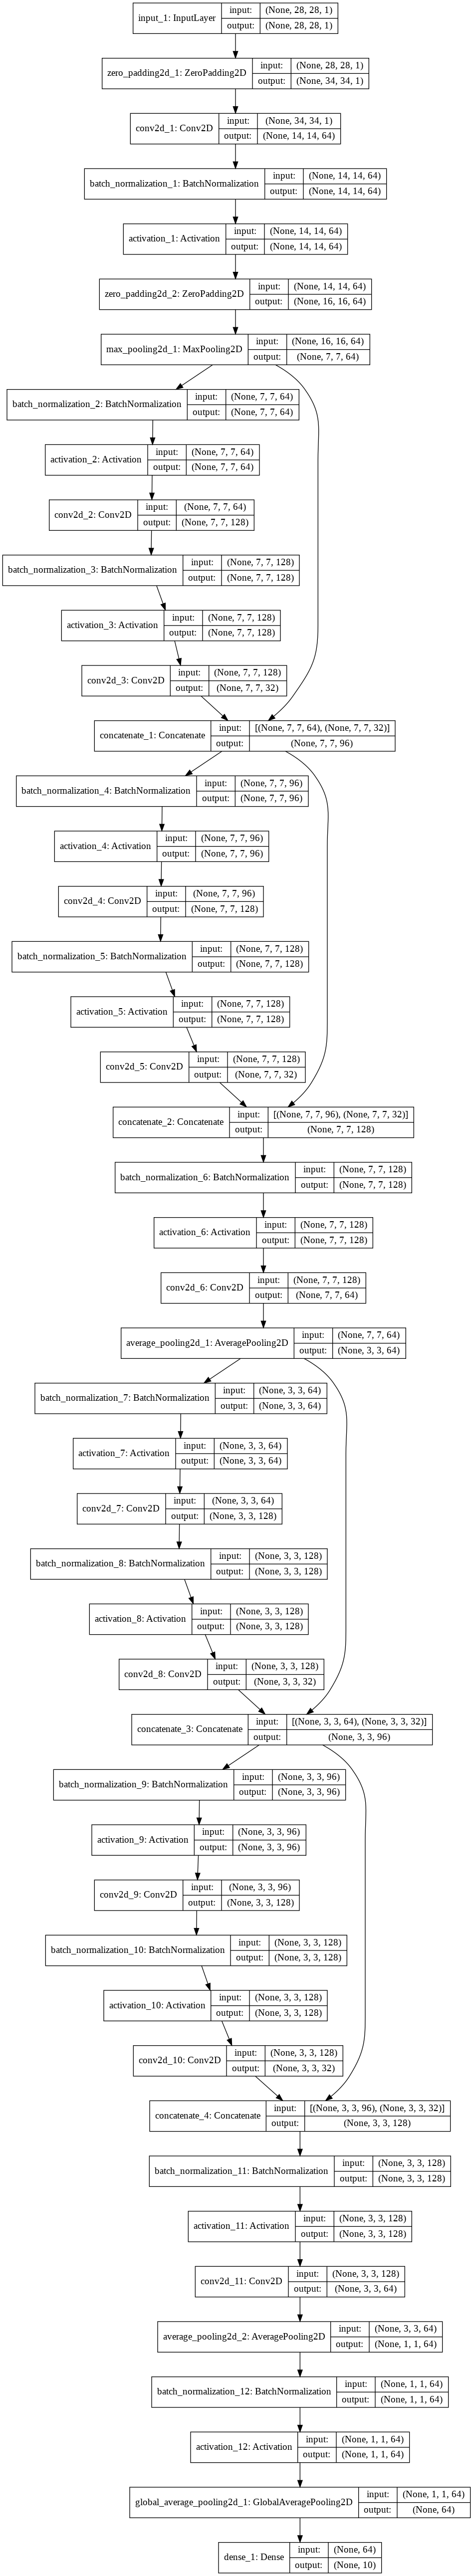

In [5]:
model.summary()
keras.utils.plot_model(model, show_shapes=True, expand_nested=True)

In [6]:
model.compile(optimizer='adam', loss='categorical_crossentropy')
history = model.fit(x_train, y_train, validation_data=(x_test, y_test))

Train on 60000 samples, validate on 10000 samples
Epoch 1/1
60000/60000 [==============================] - 37s 617us/step - loss: 0.1245 - val_loss: 0.0589
